## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
# %matplotlib widget

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer' )
# Display the data table for preview
df.head()
# df.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# df1 = df[df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID']
# duplicate_mouseid = df.duplicated(['Mouse ID','Timepoint'])
# duplicate_mouseid_loc=df.loc(['Mouse ID']==duplicate_mouseid, :)

# duplicate_mouseid_loc

In [4]:
duplicate_mouseid = df.loc[df.duplicated(['Mouse ID','Timepoint'])]['Mouse ID'].unique()
duplicate_mouseid=duplicate_mouseid[0]
duplicate_mouseid

'g989'

In [5]:
df['Mouse ID']==duplicate_mouseid

0       False
1       False
2       False
3       False
4       False
        ...  
1888    False
1889    False
1890    False
1891    False
1892    False
Name: Mouse ID, Length: 1893, dtype: bool

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mouseid_data =  df.loc[df['Mouse ID']==duplicate_mouseid]
# new_df.shape
# new_df.head()
duplicate_mouseid_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df[df['Mouse ID'] != duplicate_mouseid]

clean_df

# clean_df.to_csv('test/clean_df.csv')

# clean_df.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_df['Mouse ID'].unique())


248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mice_df = clean_df.groupby(['Drug Regimen'])

tumor_vol_mean = mice_df['Tumor Volume (mm3)'].mean()
tumor_vol_median = mice_df['Tumor Volume (mm3)'].median()
tumor_vol_std = mice_df['Tumor Volume (mm3)'].std()
tumor_vol_var = mice_df['Tumor Volume (mm3)'].var()
tumor_vol_sem = mice_df['Tumor Volume (mm3)'].sem()

summary_regimen = {    'Tumor Vol Mean': tumor_vol_mean, 
                     'Tumor Vol Median': tumor_vol_median, 
                     'Tumor Vol StD': tumor_vol_std,
                     'Tumor Vol Var': tumor_vol_var,
                     'Tumor Vol SEM': tumor_vol_sem
                    }

summary_regimen_df = pd.DataFrame(summary_regimen)
summary_regimen_df




,Tumor Vol Mean,Tumor Vol Median,Tumor Vol StD,Tumor Vol Var,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mice_df['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

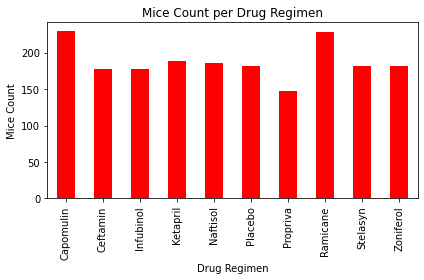

In [11]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mcount_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Mouse ID'].count())
mcount_df.rename(columns = {'Mouse ID': 'Mice Count'}, inplace=True)
mcount_df

mcount_df.plot(kind='bar', color='r', legend=False)
plt.ylabel('Mice Count')
plt.title('Mice Count per Drug Regimen')
plt.tight_layout()


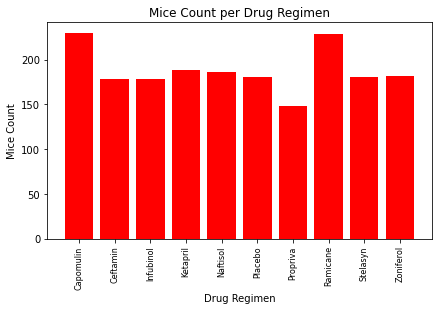

In [12]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(mcount_df.index))
labels = list(mcount_df.index)

plt.bar(x_axis, mcount_df['Mice Count'], color='r')
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.title('Mice Count per Drug Regimen')
plt.show()


In [13]:
clean_df['Sex'].value_counts()

Male      958
Female    922
Name: Sex, dtype: int64

In [14]:
gcount_df = clean_df['Sex'].value_counts()
# gcount_df = pd.DataFrame({'Mice Count':clean_df.groupby(['Sex'])['Mouse ID'].count()})

# gcount_df.reset_index(inplace=True)
gcount_df

Male      958
Female    922
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

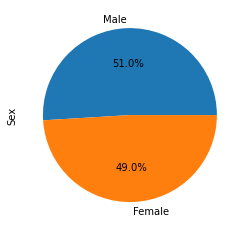

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# gcount_df = pd.DataFrame({'Mice Count':clean_df.groupby(['Sex'])['Mouse ID'].count()})

# gcount_df.reset_index(inplace=True)
gcount_df
gcount_df.plot.pie(legend=False, autopct="%1.1f%%")
# plt.title('Mice Count')

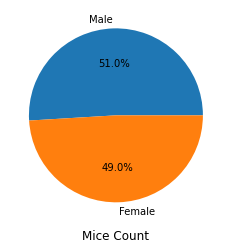

In [28]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gcount_df, labels=list(gcount_df.index), autopct="%1.1f%%")

plt.title('Mice Count', loc='center', y=-0.1)

plt.show()

In [37]:
max_tp_df = clean_df.groupby(['Mouse ID'])['Timepoint'].max()
max_tp_df = max_tp_df.reset_index()
max_tp_df

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [38]:
new_df = max_tp_df.merge(clean_df, on=['Mouse ID', 'Timepoint'], how='left')
new_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [40]:
treatments = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

In [42]:
new_df.loc[new_df['Drug Regimen'].isin(treatments)]

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
3,a275,45,Ceftamin,Female,20,28,62.999356,3
6,a411,45,Ramicane,Male,3,22,38.407618,1
7,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
238,y769,45,Ceftamin,Female,6,27,68.594745,4
239,y793,45,Capomulin,Male,17,17,31.896238,2
240,y865,45,Ceftamin,Male,23,26,64.729837,3
244,z578,45,Ramicane,Male,11,16,30.638696,0


## Quartiles, Outliers and Boxplots

In [43]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# # Start by getting the last (greatest) timepoint for each mouse
# max_tp = clean_df['Timepoint'].max()

# max_tp_data = clean_df.loc[((clean_df['Drug Regimen']=='Capomulin') | (clean_df['Drug Regimen']=='Ramicane')|(clean_df['Drug Regimen']=='Infubinol')|(clean_df['Drug Regimen']=='Ceftamin')) & (clean_df['Timepoint']==max_tp) ,['Tumor Volume (mm3)']]

# # max_tp_Capomulin = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# # max_tp_Ramicane = clean_df.loc[(clean_df['Drug Regimen']=='Ramicane') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# # max_tp_Infubinol = clean_df.loc[(clean_df['Drug Regimen']=='Infubinol') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# # max_tp_Ceftamin = clean_df.loc[(clean_df['Drug Regimen']=='Ceftamin') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# # max_tp_df = pd.concat([max_tp_Capomulin, max_tp_Ramicane, max_tp_Infubinol, max_tp_Ceftamin ])
# # # max_tp_Capomulin
# # # max_tp_Ramicane
# # # max_tp_Infubinol
# # # max_tp_Ceftamin   

# # max_tp_df
# max_tp_data.rename(columns={'Tumor Volume (mm3)': 'Last Timepoint Tumor Vol'}, inplace=True)           
# max_tp_data



In [48]:
#create a boxplot
treatments_df = new_df.loc[new_df['Drug Regimen'].isin(treatments)]

treatments_df = treatments_df[['Drug Regimen','Tumor Volume (mm3)']]
treatments_df
# treatments_df.plot.box()

,Drug Regimen,Tumor Volume (mm3)
0,Infubinol,67.973419
1,Infubinol,65.525743
3,Ceftamin,62.999356
6,Ramicane,38.407618
7,Ramicane,43.047543
...,...,...
238,Ceftamin,68.594745
239,Capomulin,31.896238
240,Ceftamin,64.729837
244,Ramicane,30.638696


In [49]:
treatments

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [56]:
final_treatments_df=treatments_df.loc[treatments_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)']
final_treatments_df

19     38.982878
24     38.939633
61     30.485985
64     37.074024
66     40.159220
80     47.685963
83     37.311846
85     38.125164
87     38.753265
108    41.483008
115    38.846876
121    28.430964
124    33.329098
162    46.539206
163    32.377357
169    41.581521
174    23.343598
180    40.728578
183    34.455298
192    31.023923
204    40.658124
208    39.952347
220    36.041047
226    28.484033
239    31.896238
Name: Tumor Volume (mm3), dtype: float64

In [58]:
list_tumorvol = []


for drug in treatments:
    final_treatments_df=treatments_df.loc[treatments_df['Drug Regimen']==drug]['Tumor Volume (mm3)']
    list_tumorvol.append(final_treatments_df)
    
list_tumorvol

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [61]:
outliers_red = dict(markerfacecolor='red' , markersize=13)

{'whiskers': [<matplotlib.lines.Line2D at 0x20cf8c31670>,
 'caps': [<matplotlib.lines.Line2D at 0x20cf8c31d60>,
 'boxes': [<matplotlib.lines.Line2D at 0x20cf8c31310>,
 'medians': [<matplotlib.lines.Line2D at 0x20cf8c3b460>,
 'fliers': [<matplotlib.lines.Line2D at 0x20cf8c3b7c0>,
 'means': []}

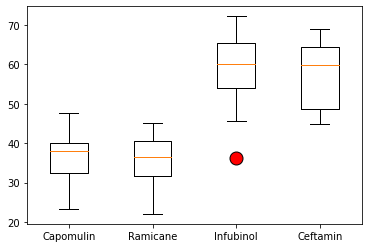

In [62]:
plt.boxplot(list_tumorvol, labels=treatments, flierprops=outliers_red)

In [ ]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

# merged_df = pd.merge(clean_df,max_tp_data, left_index=True, right_index=True )
# merged_df

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
# treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']



# Create empty list to fill with tumor vol data (for plotting)




# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
